In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unemploymentdata.xlsx to unemploymentdata (4).xlsx


In [ ]:
import io
unemployment_data = pd.read_excel(io.BytesIO(uploaded['unemploymentdata.xlsx']))

In [ ]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Old_Ward_Code                  659 non-null    object 
 1   New_ward_code                  659 non-null    object 
 2   Ward                           657 non-null    object 
 3   Borough                        659 non-null    object 
 4   Unemployment_rate_2013         659 non-null    float64
 5   Unemployment_rate_2013_scaled  659 non-null    float64
dtypes: float64(2), object(4)
memory usage: 31.1+ KB


In [ ]:
unemployment_data.Unemployment_rate_2013.std()

3.308749395059806

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
remove_outlier(unemployment_data, "Unemployment_rate_2013")

,Old_Ward_Code,New_ward_code,Ward,Borough,Unemployment_rate_2013,Unemployment_rate_2013_scaled
1,00AA,E09000001,City of London,City of London,2.234870,6.754425
2,00ABFX,E05000026,Abbey,Barking and Dagenham,8.905805,26.915925
3,00ABFY,E05000027,Alibon,Barking and Dagenham,10.202542,30.835040
4,00ABFZ,E05000028,Becontree,Barking and Dagenham,9.930396,30.012537
5,00ABGA,E05000029,Chadwell Heath,Barking and Dagenham,8.591037,25.964604
...,...,...,...,...,...,...
655,00BF,E09000029,SUTTON,Sutton,3.459205,10.454720
656,00BG,E09000030,TOWER HAMLETS,Tower Hamlets,9.172354,27.721512
657,00BH,E09000031,WALTHAM FOREST,Waltham Forest,8.393529,25.367679
658,00BJ,E09000032,WANDSWORTH,Wandsworth,3.663954,11.073531


In [ ]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Old_Ward_Code                  659 non-null    object 
 1   New_ward_code                  659 non-null    object 
 2   Ward                           657 non-null    object 
 3   Borough                        659 non-null    object 
 4   Unemployment_rate_2013         659 non-null    float64
 5   Unemployment_rate_2013_scaled  659 non-null    float64
dtypes: float64(2), object(4)
memory usage: 31.1+ KB


In [ ]:
unemployment_data.Unemployment_rate_2013.std()

3.308749395059806

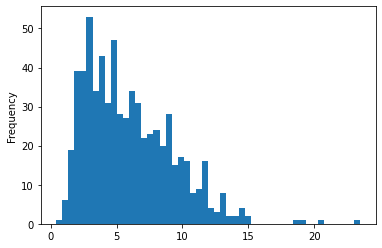

In [ ]:
unemployment_data.Unemployment_rate_2013.plot.hist(bins=50)

In [ ]:
unemployment_data["Unemployment_rate_2013_log"]= np.log(unemployment_data.Unemployment_rate_2013)

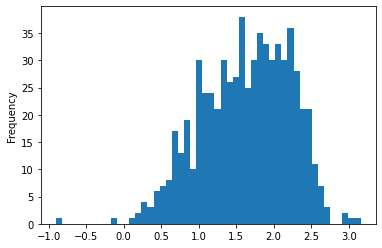

In [ ]:
unemployment_data.Unemployment_rate_2013_log.plot.hist(bins=50)

In [ ]:
unemployment_data.Unemployment_rate_2013_log.std()

0.58789867291056